In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cv2

In [3]:
cat4 = cv2.imread('cat.jpg')

In [4]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

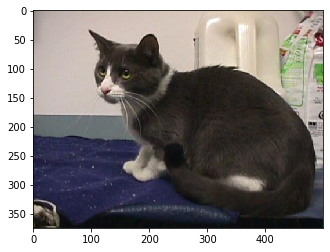

In [5]:
plt.imshow(cat4)

In [6]:
cat4.shape

(375, 500, 3)

In [7]:
dog2 = cv2.imread('2.jpg')

In [8]:
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

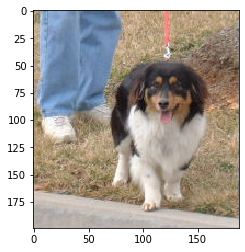

In [9]:
plt.imshow(dog2)

In [10]:
dog2.shape

(199, 188, 3)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen = ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

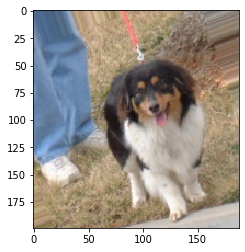

In [13]:
plt.imshow(image_gen.random_transform(dog2))

In [14]:
image_gen.flow_from_directory('C:\\Users\\Vedhanarayanan\\Documents\\Python\\data science\\computer vision\\opencv_basics\\CATS_DOGS\\train')

Found 18743 images belonging to 2 classes.


In [15]:
input_shape = (150,150,3)

In [16]:
from keras.models import Sequential

In [17]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(128))
model.add(Activation('relu'))

In [24]:
model.add(Dropout(0.5))

In [25]:
model.add(Dense(1))

In [26]:
model.add(Activation('sigmoid'))

In [27]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [29]:
batch_size=16
train_image_gen = image_gen.flow_from_directory('C:\\Users\\Vedhanarayanan\\Documents\\Python\\data science\\computer vision\\opencv_basics\\CATS_DOGS\\train',target_size=input_shape[:2],batch_size=batch_size,class_mode='binary')


Found 18743 images belonging to 2 classes.


In [30]:
test_image_gen = image_gen.flow_from_directory('C:\\Users\\Vedhanarayanan\\Documents\\Python\\data science\\computer vision\\opencv_basics\\CATS_DOGS\\test',target_size=input_shape[:2],batch_size=batch_size,class_mode='binary')

Found 6247 images belonging to 2 classes.


In [31]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [32]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,validation_data=test_image_gen,validation_steps=12)

Instructions for updating:
Please use Model.fit, which supports generators.
150/150 [==============================] - 171s 1s/step - loss: 6.1194e-08 - accuracy: 0.5113 - val_loss: 5.7742e-08 - val_accuracy: 0.4844


In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
results.history['accuracy']

[0.5112500190734863]

In [35]:
from keras.models import load_model

In [36]:
model.save('cat_dog_100epochs.h5')

In [37]:
new_model = load_model('cat_dog_100epochs.h5')

In [38]:
dog_file = 'kitty.jpg'

In [39]:
from keras.preprocessing import image

In [41]:
dog_img = image.load_img(dog_file,target_size=(150,150))

In [42]:
dog_img = image.img_to_array(dog_img)

In [43]:
dog_img.shape

(150, 150, 3)

In [44]:
import numpy as np

In [45]:
dog_img = np.expand_dims(dog_img,axis=0)

In [46]:
dog_img.shape

(1, 150, 150, 3)

In [47]:
dog_img = dog_img/255

In [48]:
model.predict_classes(dog_img)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1]])

In [49]:
model.predict(dog_img)

array([[0.5490378]], dtype=float32)